**Parte 1 - Data ETL, Data Wrangling e Data Exploration**

Para começar, realize o download dos arquivos necessários no link acima. 


**Zip instructions** - Arquivos de coleta de vibração crua:

●	Os arquivos se encontram no formato CSV “*.csv”.

●	Em cada arquivo existe uma coleta de vibração realizada pelo sensor “band-aid”

●	O nome do arquivo traz as seguintes informações: “{start}-{interval}-{sensor_id}.bin”

  ●	Exemplo: 1623535615-3006-IAJ9206.csv

    ■	start: 1623535615 [epoch Unix]

    ■	interval - sampling duration: 3006 [ms]

    ■	sensor_id: IAJ9206 [string que identifica um sensor]

●	As coletas dizem respeito aos dados de aceleração em g nos eixos X, Y, Z de um acelerômetro.


In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.chdir("/content/drive/MyDrive/trabalhos/python/exercicios/tractian/Colab Notebooks/part_1")

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print()
print("Content %r" % (cwd))
print()
print("Files in %s" % (files))


Content '/content/drive/MyDrive/trabalhos/python/exercicios/tractian/Colab Notebooks/part_1'

Files in ['1623535615-3006-IAJ9206.csv', '1624374799-3006-MYS2071.csv', '1624040490-2957-NAI1549.csv', '1624962426-3006-NAH4736.csv']


**1.	Apresentar os dados contidos nos arquivos no domínio do tempo.**



In [3]:
dataset1 = pd.read_csv("1623535615-3006-IAJ9206.csv")
dataset2 = pd.read_csv("1624040490-2957-NAI1549.csv")
dataset3 = pd.read_csv("1624374799-3006-MYS2071.csv")
dataset4 = pd.read_csv("1624962426-3006-NAH4736.csv")

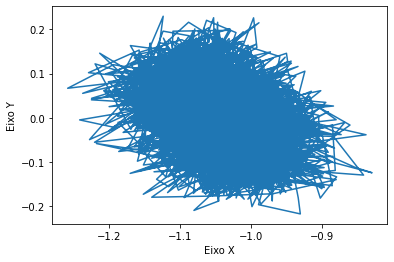

,x,y
0,-1.003174,-0.097778
1,-0.993591,-0.084778
2,-0.964844,-0.048462
3,-0.868591,-0.010437
4,-0.885498,-0.041992
...,...,...
4975,-1.015808,0.047424
4976,-1.054077,-0.048462
4977,-1.090515,-0.046814
4978,-1.070557,-0.042114


In [4]:
plt.plot(dataset1.x, dataset1.y)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

dataset1[['x','y']]

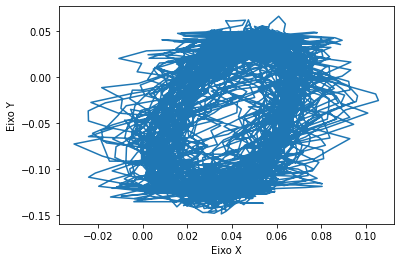

,x,y
0,0.029053,0.040283
1,0.034851,0.041809
2,0.043213,0.046143
3,0.042297,0.037048
4,0.050903,0.031860
...,...,...
4975,0.027710,-0.129272
4976,0.028137,-0.121277
4977,0.023621,-0.123108
4978,0.019714,-0.119324


In [5]:
plt.plot(dataset2.x, dataset2.y)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

dataset2[['x','y']]

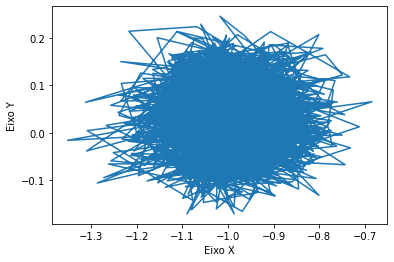

,x,y
0,-0.913757,0.082458
1,-1.098572,0.048035
2,-1.151794,0.058899
3,-1.091187,-0.041626
4,-1.145691,-0.017517
...,...,...
4975,-1.025757,0.023438
4976,-1.008545,0.030273
4977,-1.039795,0.003662
4978,-1.066589,0.002869


In [6]:
plt.plot(dataset3.x, dataset3.y)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

dataset3[['x','y']]

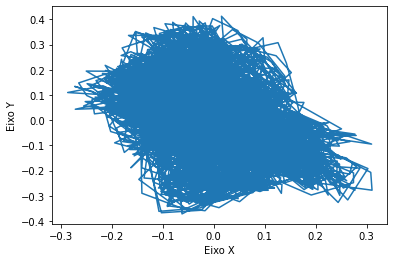

,x,y
0,0.056030,-0.132202
1,0.012695,-0.122559
2,-0.034119,-0.059143
3,-0.099854,-0.018066
4,-0.147156,-0.015686
...,...,...
4975,0.096008,-0.032776
4976,0.075439,0.002808
4977,-0.041138,0.114014
4978,-0.066406,0.238770


In [7]:
plt.plot(dataset4.x, dataset4.y)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

dataset4[['x','y']]

**2.	Apresentar os dados contidos nos arquivos no domínio da frequência (fft).**

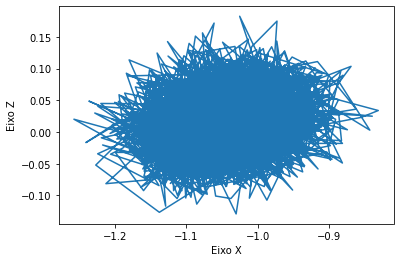

,x,z
0,-1.003174,-0.017334
1,-0.993591,-0.009766
2,-0.964844,0.062012
3,-0.868591,0.103577
4,-0.885498,0.078003
...,...,...
4975,-1.015808,0.120422
4976,-1.054077,-0.051331
4977,-1.090515,-0.054749
4978,-1.070557,-0.030212


In [8]:
plt.plot(dataset1.x, dataset1.z)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Z')
plt.show()

dataset1[['x','z']]

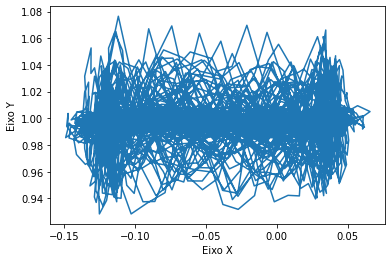

,x,z
0,0.029053,0.995361
1,0.034851,0.991455
2,0.043213,0.988708
3,0.042297,0.990601
4,0.050903,0.996826
...,...,...
4975,0.027710,0.993530
4976,0.028137,0.993469
4977,0.023621,0.988708
4978,0.019714,0.985535


In [9]:
plt.plot(dataset2.y, dataset2.z)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

dataset2[['x','z']]

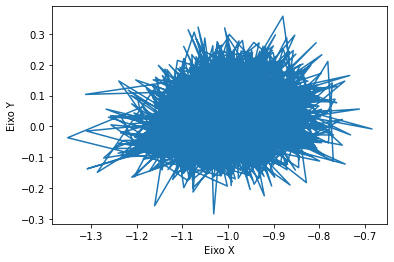

,x,z
0,-0.913757,-0.118225
1,-1.098572,-0.115417
2,-1.151794,-0.067078
3,-1.091187,-0.098022
4,-1.145691,-0.100891
...,...,...
4975,-1.025757,0.065430
4976,-1.008545,-0.014282
4977,-1.039795,0.124329
4978,-1.066589,0.129089


In [10]:
plt.plot(dataset3.x, dataset3.z)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

dataset3[['x','z']]

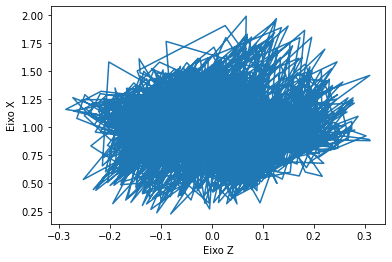

,x,z
0,0.056030,1.070740
1,0.012695,1.105103
2,-0.034119,1.287842
3,-0.099854,1.352234
4,-0.147156,1.086365
...,...,...
4975,0.096008,1.068115
4976,0.075439,1.206482
4977,-0.041138,0.938843
4978,-0.066406,1.069580


In [11]:
plt.plot(dataset4.x, dataset4.z)
plt.ylabel('Eixo X')
plt.xlabel('Eixo Z')
plt.show()

dataset4[['x','z']]

**3.	Aplicar filtros, se necessário, para limpar e corrigir os sinais da melhor forma possível.**

**4.	[Bônus] Criar uma função capaz de identificar os harmônicos e picos no domínio da frequência, de maneira a reduzir a quantidade de dados e filtrar a informação relevante.**

**Parte 2 - Machine Learning, Deep learning e Data Driven Solutions:**

Assim como na etapa anterior você deve utilizar os arquivos disponibilizados, os quais podem ser encontrados aqui. 


Considerando os dados contidos nesses arquivos você deve completar as seguintes etapas:


In [12]:
os.chdir("/content/drive/MyDrive/trabalhos/python/exercicios/tractian/Colab Notebooks/part_2")

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print()
print("Content %r" % (cwd))
print()
print("Files in %s" % (files))


Content '/content/drive/MyDrive/trabalhos/python/exercicios/tractian/Colab Notebooks/part_2'

Files in ['assets.csv', 'collects.csv']


**collects.csv**: Contém uma lista de objetos que representam as coletas obtidas para diferentes ativos.

In [13]:
dt_collects = pd.read_csv("collects.csv")
dt_collects

,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp
0,60b57955f77013684c413e39,2021-06-01T00:03:33.370Z,0.010463,0.004463,0.011677,3.006,1656.686627,1.622506e+09,0.000511,0.000176,0.000289,IAJ9206,23.94
1,60b57c53f77013684c41409f,2021-06-01T00:16:19.173Z,0.011437,0.004983,0.011482,3.006,1656.686627,1.622507e+09,0.000633,0.000238,0.000292,IAJ9206,23.19
2,60b57f34f77013684c4142cd,2021-06-01T00:28:36.553Z,0.010494,0.005024,0.011120,3.006,1656.686627,1.622507e+09,0.000524,0.000226,0.000246,IAJ9206,22.50
3,60b58237f77013684c41450c,2021-06-01T00:41:27.622Z,0.009859,0.004786,0.011096,3.006,1656.686627,1.622508e+09,0.000437,0.000220,0.000248,IAJ9206,22.87
4,60b58515f77013684c414765,2021-06-01T00:53:41.450Z,0.010014,0.005213,0.011332,3.006,1656.686627,1.622509e+09,0.000501,0.000251,0.000275,IAJ9206,22.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,60e4ee0b35645405b62ea2f5,2021-07-06T23:58:03.000Z,0.048851,0.080684,0.063319,2.710,1527.306273,1.625616e+09,0.000762,0.001369,0.001054,NEW4797,54.98
33897,60e4f20435645405b62ea5b4,2021-07-07T00:15:00.431Z,0.049630,0.084657,0.065195,2.710,1527.306273,1.625617e+09,0.000791,0.001380,0.001174,NEW4797,55.35
33898,60e4f62635645405b62ea8b5,2021-07-07T00:32:38.904Z,0.048705,0.069750,0.132227,2.712,1526.179941,1.625618e+09,0.000725,0.001206,0.001403,NEW4797,55.64
33899,60e4fa6035645405b62eabaf,2021-07-07T00:50:40.423Z,0.049600,0.068588,0.131735,2.711,1526.742899,1.625619e+09,0.000740,0.001337,0.001374,NEW4797,55.78


In [14]:
missing_val_count_by_column = (dt_collects['params.duration'].isna().sum())

columns_with_nan = missing_val_count_by_column[missing_val_count_by_column > 0]

# if database have some NA column, fillna this
if (columns_with_nan.any() == 1):
    dt_collects['params.duration'] = dt_collects['params.duration'].fillna(dt_collects['params.duration'].mean())

In [15]:
dt_collects['params.duration'].unique()

array([3.006     , 3.007     , 3.16131228, 3.044     , 3.008     ,
       4.001     , 4.745     , 4.744     , 4.746     , 4.748     ,
       4.747     , 4.743     , 4.841     , 3.051     , 3.084     ,
       3.086     , 5.444     , 4.742     , 3.083     , 4.791     ,
       5.142     , 5.041     , 3.085     , 4.739     , 4.892     ,
       4.842     , 3.082     , 4.74      , 5.092     , 3.05      ,
       4.84      , 4.741     , 4.943     , 3.054     , 1.961     ,
       4.792     , 4.795     , 4.994     , 3.087     , 2.957     ,
       2.958     , 4.003     , 4.004     , 2.956     , 2.712     ,
       2.711     , 2.71      , 2.709     , 2.713     , 2.707     ])

In [16]:
dt_collects.columns

Index(['_id', 'createdAt', 'params.accelRMS.x', 'params.accelRMS.y',
       'params.accelRMS.z', 'params.duration', 'params.sampRate',
       'params.timeStart', 'params.velRMS.x', 'params.velRMS.y',
       'params.velRMS.z', 'sensorId', 'temp'],
      dtype='object')

**assets.csv**: Contém as informações sobre os ativos aos quais as coletas fornecidas pertencem.

In [17]:
dt_assets = pd.read_csv("assets.csv")
dt_assets

,_id,company,createdAt,description,model,modelType,name,sensors,specifications.axisX,specifications.axisY,specifications.axisZ,specifications.maxDowntime,specifications.maxTemp,specifications.power,specifications.rpm,specifications.workdays
0,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,"[""IAJ9206""]",vertical,horizontal,axial,48.00,NaN,3.7,1735.0,NaN
1,5fd0e297bf7d581c1823b8e4,5fbbadeb82a6b901c26df618,2020-12-09T14:43:35.168Z,NaN,5fd0cf96bf7d581c1823b4c4,heaterFurnace,RDF-61.1,"[""LZY4270""]",axial,vertical,horizontal,0.25,55.0,0.0,1740.0,NaN
2,5fb286de1369a4325dc45433,5f6b83e34dd69d4bc799ea1f,2020-11-16T14:04:14.564Z,-,5fb275981369a4325dc4542e,transformer,TRANSFORMADOR 500 KVA N°1,"[""MUR8453""]",horizontal,vertical,NaN,NaN,65.0,NaN,NaN,NaN
3,6023fad9ed8ef30e9d30952b,5fb2c4eb1369a4325dc4545f,2021-02-10T15:25:13.265Z,NaN,6023f7dced8ef30e9d30945f,pump,Motor Bomba - Tanque de Expansão Tubo Verde,"[""MXK6435""]",horizontal,axial,vertical,48.00,NaN,7.0,3525.0,NaN
4,5ff71a150b6abb7be05083b0,5f17203f640a00cc08cb1b3d,2021-01-07T14:26:29.726Z,NaN,5ff5a854adacd8372cf06950,pump,CAG1- BAGS.12- Motor,"[""MYD8706""]",horizontal,axial,vertical,NaN,NaN,30.0,1765.0,NaN
5,5fd10441bf7d581c1823bf81,5fbbadeb82a6b901c26df618,2020-12-09T17:07:13.817Z,NaN,5fd10441bf7d581c1823bf80,heaterFurnace,VTF-61.1,"[""MYS2071""]",axial,radial,horizontal,0.25,60.0,1.5,894.0,[]
6,5f92d9195676a32f97af5b65,5f8e02389950c66265569378,2020-10-23T13:22:33.577Z,-,604a3f1ba76ffc0ebb727d05,eletricMotor,Boko MA-1510 - Motor 2 da UH,"[""MZU6388""]",horizontal,vertical,radial,NaN,65.0,37.0,1750.0,"[0,1,2,3,4,5]"
7,602fb8a228aba1048d474016,5fb2c4eb1369a4325dc4545f,2021-02-19T13:09:54.165Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador -GA75 FF - Prédio B104,"[""NAH4736""]",NaN,NaN,NaN,48.00,NaN,2.0,1080.0,NaN
8,5ff7346c0b6abb7be050876b,5f17203f640a00cc08cb1b3d,2021-01-07T16:18:52.234Z,NaN,5ff5a854adacd8372cf06950,pump,CAG1- BAGS.3- Motor,"[""NAI1549""]",axial,horizontal,vertical,NaN,NaN,75.0,1775.0,NaN
9,5f71d44967198d5d37e27d50,5f6b83e34dd69d4bc799ea1f,2020-09-28T12:17:13.295Z,Rotuladora Sidel,5f71d44867198d5d37e27d4f,other,ROTULADORA SIDEL,"[""NEW4797""]",NaN,NaN,NaN,1.00,70.0,NaN,1458.0,NaN


In [18]:
dt_assets.columns

Index(['_id', 'company', 'createdAt', 'description', 'model', 'modelType',
       'name', 'sensors', 'specifications.axisX', 'specifications.axisY',
       'specifications.axisZ', 'specifications.maxDowntime',
       'specifications.maxTemp', 'specifications.power', 'specifications.rpm',
       'specifications.workdays'],
      dtype='object')

**1.	Apresentar visualmente os dados contidos em cada arquivo, juntamente com as informações do ativo a que pertencem.**

In [19]:
for i in range(len(dt_assets)):
  dt_assets['sensors'][i] = dt_assets['sensors'][i].replace('["', '')
  dt_assets['sensors'][i] = dt_assets['sensors'][i].replace('"]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
dt_merge = pd.merge(dt_collects, dt_assets, left_on=['sensorId'], right_on=['sensors'])

dt_merge

,_id_x,createdAt_x,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,_id_y,company,createdAt_y,description,model,modelType,name,sensors,specifications.axisX,specifications.axisY,specifications.axisZ,specifications.maxDowntime,specifications.maxTemp,specifications.power,specifications.rpm,specifications.workdays
0,60b57955f77013684c413e39,2021-06-01T00:03:33.370Z,0.010463,0.004463,0.011677,3.006,1656.686627,1.622506e+09,0.000511,0.000176,0.000289,IAJ9206,23.94,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,IAJ9206,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
1,60b57c53f77013684c41409f,2021-06-01T00:16:19.173Z,0.011437,0.004983,0.011482,3.006,1656.686627,1.622507e+09,0.000633,0.000238,0.000292,IAJ9206,23.19,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,IAJ9206,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
2,60b57f34f77013684c4142cd,2021-06-01T00:28:36.553Z,0.010494,0.005024,0.011120,3.006,1656.686627,1.622507e+09,0.000524,0.000226,0.000246,IAJ9206,22.50,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,IAJ9206,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
3,60b58237f77013684c41450c,2021-06-01T00:41:27.622Z,0.009859,0.004786,0.011096,3.006,1656.686627,1.622508e+09,0.000437,0.000220,0.000248,IAJ9206,22.87,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,IAJ9206,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
4,60b58515f77013684c414765,2021-06-01T00:53:41.450Z,0.010014,0.005213,0.011332,3.006,1656.686627,1.622509e+09,0.000501,0.000251,0.000275,IAJ9206,22.56,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,IAJ9206,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,60e4ee0b35645405b62ea2f5,2021-07-06T23:58:03.000Z,0.048851,0.080684,0.063319,2.710,1527.306273,1.625616e+09,0.000762,0.001369,0.001054,NEW4797,54.98,5f71d44967198d5d37e27d50,5f6b83e34dd69d4bc799ea1f,2020-09-28T12:17:13.295Z,Rotuladora Sidel,5f71d44867198d5d37e27d4f,other,ROTULADORA SIDEL,NEW4797,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN
33897,60e4f20435645405b62ea5b4,2021-07-07T00:15:00.431Z,0.049630,0.084657,0.065195,2.710,1527.306273,1.625617e+09,0.000791,0.001380,0.001174,NEW4797,55.35,5f71d44967198d5d37e27d50,5f6b83e34dd69d4bc799ea1f,2020-09-28T12:17:13.295Z,Rotuladora Sidel,5f71d44867198d5d37e27d4f,other,ROTULADORA SIDEL,NEW4797,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN
33898,60e4f62635645405b62ea8b5,2021-07-07T00:32:38.904Z,0.048705,0.069750,0.132227,2.712,1526.179941,1.625618e+09,0.000725,0.001206,0.001403,NEW4797,55.64,5f71d44967198d5d37e27d50,5f6b83e34dd69d4bc799ea1f,2020-09-28T12:17:13.295Z,Rotuladora Sidel,5f71d44867198d5d37e27d4f,other,ROTULADORA SIDEL,NEW4797,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN
33899,60e4fa6035645405b62eabaf,2021-07-07T00:50:40.423Z,0.049600,0.068588,0.131735,2.711,1526.742899,1.625619e+09,0.000740,0.001337,0.001374,NEW4797,55.78,5f71d44967198d5d37e27d50,5f6b83e34dd69d4bc799ea1f,2020-09-28T12:17:13.295Z,Rotuladora Sidel,5f71d44867198d5d37e27d4f,other,ROTULADORA SIDEL,NEW4797,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN


In [21]:
dt_merge.columns

Index(['_id_x', 'createdAt_x', 'params.accelRMS.x', 'params.accelRMS.y',
       'params.accelRMS.z', 'params.duration', 'params.sampRate',
       'params.timeStart', 'params.velRMS.x', 'params.velRMS.y',
       'params.velRMS.z', 'sensorId', 'temp', '_id_y', 'company',
       'createdAt_y', 'description', 'model', 'modelType', 'name', 'sensors',
       'specifications.axisX', 'specifications.axisY', 'specifications.axisZ',
       'specifications.maxDowntime', 'specifications.maxTemp',
       'specifications.power', 'specifications.rpm',
       'specifications.workdays'],
      dtype='object')

In [22]:
dt_merge['specifications.workdays'].unique()

array([nan, '[]', '[0,1,2,3,4,5]'], dtype=object)

**2.	Desenvolver um modelo/função capaz de calcular o tempo de downtime e uptime para um ativo qualquer.**

**uptime** - tempo que está disponível, isto é, ligado e operando normalmente

**downtime** — tempo de inatividade do equipamento

In [23]:
dt_merge[['params.duration', 'specifications.maxDowntime', 'sensors']]

,params.duration,specifications.maxDowntime,sensors
0,3.006,48.0,IAJ9206
1,3.006,48.0,IAJ9206
2,3.006,48.0,IAJ9206
3,3.006,48.0,IAJ9206
4,3.006,48.0,IAJ9206
...,...,...,...
33896,2.710,1.0,NEW4797
33897,2.710,1.0,NEW4797
33898,2.712,1.0,NEW4797
33899,2.711,1.0,NEW4797


**3.	Desenvolver um modelo/função capaz de identificar mudanças nos padrões de vibração para um ativo qualquer.**

In [24]:
dt_merge[['params.accelRMS.x', 'params.accelRMS.y', 'params.accelRMS.z', 'params.duration', 'params.velRMS.x', 'sensors']]

,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.velRMS.x,sensors
0,0.010463,0.004463,0.011677,3.006,0.000511,IAJ9206
1,0.011437,0.004983,0.011482,3.006,0.000633,IAJ9206
2,0.010494,0.005024,0.011120,3.006,0.000524,IAJ9206
3,0.009859,0.004786,0.011096,3.006,0.000437,IAJ9206
4,0.010014,0.005213,0.011332,3.006,0.000501,IAJ9206
...,...,...,...,...,...,...
33896,0.048851,0.080684,0.063319,2.710,0.000762,NEW4797
33897,0.049630,0.084657,0.065195,2.710,0.000791,NEW4797
33898,0.048705,0.069750,0.132227,2.712,0.000725,NEW4797
33899,0.049600,0.068588,0.131735,2.711,0.000740,NEW4797


**4.	Identificar possíveis falhas nos ativos utilizando o modelo desenvolvido no item 3 ou um novo modelo (a identificação deve ser autônoma e não uma análise visual).**


**Parte 3 - Perguntas:**

Responda às seguintes perguntas com suas próprias palavras, da maneira mais inteligível possível para um leigo da área. Você pode utilizar a internet como ferramenta de pesquisa, entretanto as respostas devem ser de sua autoria.

**1.	O que é um 'viés de seleção'?**

**2.	O que é uma 'análise do poder'?**



**3.	Qual é melhor ou mais importante, ter bons dados ou construir bons modelos?**

In [24]:
Não adianta ter bons modelos se não há bons dados, sendo assim não há bons modelos sem bons dados.

Respondendo a questão, é melhor e mais importante ter bons dados.

**4.	Quais são as maneiras de definir o número de clusters em um algoritmo de clustering? Como saber se o resultado obtido foi satisfatório?**

O cientista de dados deve ser o mais completo dentre os profissionais da área de dados, sendo assim, não se limite de nenhuma forma durante a execução desse desafio, deixe claras todas as suas considerações e conclusões.

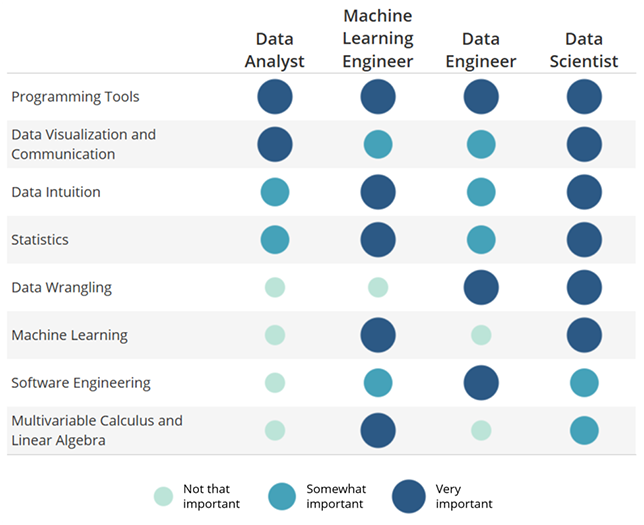